## 一元线性模型
#### 假设有变量$x_i$和目标$y_i$，每个$i$对应于一个数据点（样本），我们希望建立一个模型$$\widehat{y_i}=wx_i+b$$
#### $\widehat{y_i}$是预测的结果，我们希望通过 $\widehat{y_i}$来拟合目标$y_i$，即最小化$$\frac{1}{n}\sum_{i=1}^{n}(\widehat{y_i}-y_i)^2$$
#### 其中，n是样本数量。那么如何最小化这个误差呢？这里就需要用到梯度下降了。
## 梯度下降
#### 更新规则：$$w^{i+1}=w^i-\eta\frac{\partial loss}{\partial w}$$

In [1]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(1234)

In [2]:
# 读取数据x和y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 绘制数据图像
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'bo', label='sample points')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# 转换为tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [4]:
# 定义参数w和b
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

In [5]:
# 因为w和b都是变量，所以x_train和y_train也必须是变量，但是不用求梯度
x_train = Variable(x_train)
y_train = Variable(y_train)

# 构建线性回归模型
def linear_model(x):
    return x * w + b

In [6]:
# 定义好了模型之后，在更新参数之前，看看模型的输出长什么样
y_ = linear_model(x_train)
y_

tensor([[0.5546],
        [0.6054],
        [0.6561],
        [0.7119],
        [0.7221],
        [0.5947],
        [0.8535],
        [0.6876],
        [0.7525],
        [0.5024],
        [0.7273],
        [0.9002],
        [0.6475],
        [0.7713],
        [0.5454]], grad_fn=<AddBackward0>)

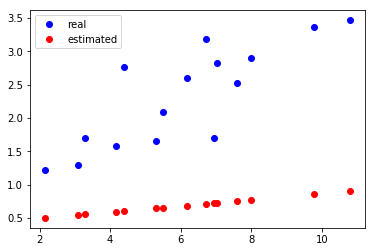

In [7]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()

#### 线性回归的损失函数是：$$loss=\frac{1}{n}\sum_{i=1}^n(\widehat{y_i}-y_i)^2$$

In [8]:
x_test = np.array([[1], [2], [3]])
x_test = torch.from_numpy(x_test)

x_test ** 2  # 向量的平方结果为每个元素的平方组成的向量

tensor([[1],
        [4],
        [9]], dtype=torch.int32)

In [9]:
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)
loss = get_loss(y_, y_train)
print(loss)

tensor(3.1195, grad_fn=<MeanBackward0>)


In [10]:
# 自动求导
loss.backward()

In [11]:
# 查看w和b的梯度
print(w.grad)
print(b.grad)

tensor([-22.2916])
tensor([-3.2845])


In [12]:
# 更新一次参数
w.data = w.data - 1e-2 * w.grad
b.data = b.data - 1e-2 * b.grad

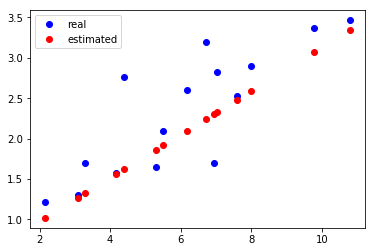

In [13]:
# 更新完一次参数之后，再一次看看模型的输出结果
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()

#### 更新完一次参数之后，可以看到红色的线比第一次更“接近”蓝色点（真实值），要更好地拟合蓝色点还需要几次更新。

In [14]:
Epochs = 10  # 训练轮数
eta = 1e-2   # 学习率
for epoch in range(Epochs):
    # 前向传播，计算预测值和loss
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    # 反向传播，计算梯度，但首先要把参数的梯度归零
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - eta * w.grad
    b.data = b.data - eta * b.grad
    print('epoch: {:2d}, loss: {:.4f}'.format(epoch + 1, loss.data.item()))
    # 如果tensor只有一个值，那么将它转化为python数值可以用.item()

epoch:  1, loss: 0.2357
epoch:  2, loss: 0.1822
epoch:  3, loss: 0.1812
epoch:  4, loss: 0.1811
epoch:  5, loss: 0.1810
epoch:  6, loss: 0.1810
epoch:  7, loss: 0.1809
epoch:  8, loss: 0.1809
epoch:  9, loss: 0.1808
epoch: 10, loss: 0.1807


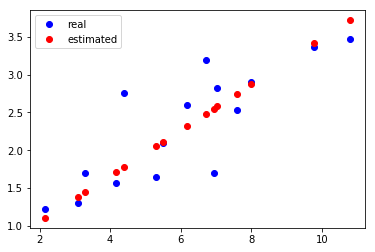

In [15]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()

## 多项式回归模型
#### $$\widehat{y_i}=w_0+w_1x+w_2x^2+w_3x^3+...$$

In [16]:
# 定义一个多变量函数
w_target = np.array([0.5, 3., 2.4])  # 定义参数
b_target = np.array([0.9])           # 定义参数

#### 由以上参数定义的模型（多项式）为：$$y=0.9+0.5x+3.0x^2+2.4x^3$$

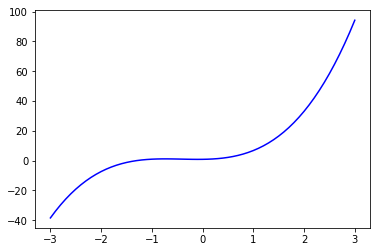

In [17]:
# 画出上面定义的多项式的图像
x_sample = np.arange(-3., 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * (x_sample ** 2) + w_target[2] * (x_sample ** 3)
plt.plot(x_sample, y_sample, 'b', label='real curve')
plt.show()
# 下图即为要拟合的曲线

In [18]:
# 要点：列表解析、矩阵转置、数据类型转换
# 1、numpy中矩阵转置用.T即可
# 2、numpy中改变array的数据类型可以用函数astype()
# 3、列表解析，比如：[i ** 2 for i in range(4)] ==> [0, 1, 4, 9]
# 相当于语句：
# num = []
# for i in range(4):
#     num.append(i ** 2)
x_train = np.array([x_sample ** i for i in range(1, 4)]).T.astype(np.float32)
print(x_train)
print(x_train.shape)

[[-3.0000000e+00  9.0000000e+00 -2.7000000e+01]
 [-2.9000001e+00  8.4099998e+00 -2.4389000e+01]
 [-2.8000000e+00  7.8400002e+00 -2.1952000e+01]
 [-2.7000000e+00  7.2900000e+00 -1.9683001e+01]
 [-2.5999999e+00  6.7600002e+00 -1.7576000e+01]
 [-2.5000000e+00  6.2500000e+00 -1.5625000e+01]
 [-2.4000001e+00  5.7600002e+00 -1.3824000e+01]
 [-2.3000000e+00  5.2900000e+00 -1.2167000e+01]
 [-2.2000000e+00  4.8400002e+00 -1.0648000e+01]
 [-2.0999999e+00  4.4099998e+00 -9.2609997e+00]
 [-2.0000000e+00  4.0000000e+00 -8.0000000e+00]
 [-1.9000000e+00  3.6099999e+00 -6.8590002e+00]
 [-1.8000000e+00  3.2400000e+00 -5.8319998e+00]
 [-1.7000000e+00  2.8900001e+00 -4.9130001e+00]
 [-1.6000000e+00  2.5599999e+00 -4.0960002e+00]
 [-1.5000000e+00  2.2500000e+00 -3.3750000e+00]
 [-1.4000000e+00  1.9600000e+00 -2.7440000e+00]
 [-1.3000000e+00  1.6900001e+00 -2.1970000e+00]
 [-1.2000000e+00  1.4400001e+00 -1.7280000e+00]
 [-1.1000000e+00  1.2100000e+00 -1.3310000e+00]
 [-1.0000000e+00  1.0000000e+00 -1.00000

In [19]:
# 将y_train定义为列向量
y_train = y_sample.reshape(-1, 1).astype(np.float32)

In [20]:
# 将numpy数组转换为tensor，然后将tensor转换为变量
x_train = Variable(torch.from_numpy(x_train))
y_train = Variable(torch.from_numpy(y_train))

In [21]:
print(x_train.shape)
print(y_train.shape)

torch.Size([61, 3])
torch.Size([61, 1])


In [22]:
# 定义模型
def polynomial_model(X):
    return torch.mm(X, W) + b  # pytorch中的矩阵乘法：torch.mm(A, B)、torch.matmul(A, B)

In [23]:
# 定义模型参数，并初始化
W = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

In [24]:
# 看看最初模型的输出
y_ = polynomial_model(x_train)

In [25]:
y_.shape

torch.Size([61, 1])

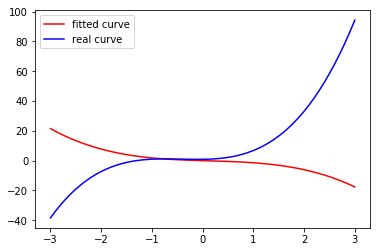

In [26]:
plt.plot(x_sample, y_.data.numpy(), 'r', label='fitted curve')
plt.plot(x_sample, y_sample, 'b', label='real curve')
plt.legend()
plt.show()

In [27]:
# 初始模型的loss
loss = get_loss(y_, y_train)
print(loss)

tensor(1356.3704, grad_fn=<MeanBackward0>)


In [28]:
# 自动求导
loss.backward()

In [29]:
# 参数的梯度
print(W.grad)
print(b.grad)

tensor([[-113.5467],
        [-101.8352],
        [-743.7994]])
tensor([-19.0562])


In [30]:
# 更新参数
W.data = W.data - 1e-3 * W.grad
b.data = b.data - 1e-3 * b.grad

In [31]:
# 用新的模型生成预测值
y_ = polynomial_model(x_train)

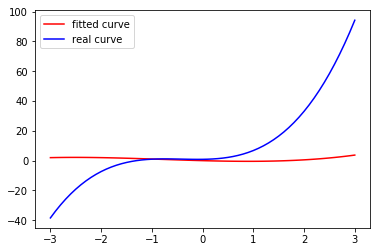

In [32]:
plt.plot(x_sample, y_.data.numpy(), 'r', label='fitted curve')
plt.plot(x_sample, y_sample, 'b', label='real curve')
plt.legend()
plt.show()

In [33]:
# 训练，在这个例子中，尤其要注意学习率的设置，学习率要设置小一点
train_loss = []
Epochs = 100
for epoch in range(Epochs):
    y_ = polynomial_model(x_train)
    loss = get_loss(y_, y_train)
    train_loss.append(loss.data.item())
    
    W.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    # 更新参数
    W.data = W.data - 0.001 * W.grad
    b.data = b.data - 0.001 * b.grad
    print('epoch: {:3d}, loss: {:.4f}'.format(epoch + 1, loss.data.item()))

epoch:   1, loss: 846.1620
epoch:   2, loss: 543.7902
epoch:   3, loss: 363.3673
epoch:   4, loss: 254.5860
epoch:   5, loss: 187.9731
epoch:   6, loss: 146.2557
epoch:   7, loss: 119.3058
epoch:   8, loss: 101.1798
epoch:   9, loss: 88.3849
epoch:  10, loss: 78.8646
epoch:  11, loss: 71.4040
epoch:  12, loss: 65.2818
epoch:  13, loss: 60.0662
epoch:  14, loss: 55.4959
epoch:  15, loss: 51.4099
epoch:  16, loss: 47.7062
epoch:  17, loss: 44.3185
epoch:  18, loss: 41.2012
epoch:  19, loss: 38.3219
epoch:  20, loss: 35.6557
epoch:  21, loss: 33.1832
epoch:  22, loss: 30.8880
epoch:  23, loss: 28.7560
epoch:  24, loss: 26.7748
epoch:  25, loss: 24.9334
epoch:  26, loss: 23.2216
epoch:  27, loss: 21.6301
epoch:  28, loss: 20.1503
epoch:  29, loss: 18.7744
epoch:  30, loss: 17.4950
epoch:  31, loss: 16.3054
epoch:  32, loss: 15.1992
epoch:  33, loss: 14.1705
epoch:  34, loss: 13.2140
epoch:  35, loss: 12.3245
epoch:  36, loss: 11.4973
epoch:  37, loss: 10.7282
epoch:  38, loss: 10.0129
epoc

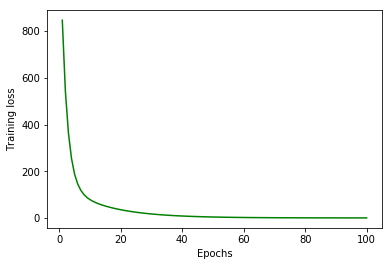

In [34]:
plt.plot(range(1, 100 + 1), train_loss, 'g')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

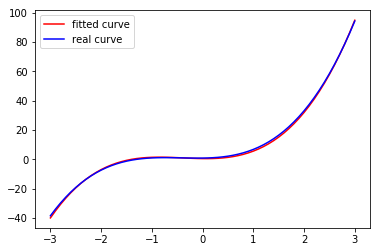

In [35]:
y_ = polynomial_model(x_train)
plt.plot(x_sample, y_.data.numpy(), 'r', label='fitted curve')
plt.plot(x_sample, y_sample, 'b', label='real curve')
plt.legend()
plt.show()